<b>1</b> OBTENCIÓN DE DATOS

0
164
103
Muestras Ramas 21.000000
Muestras Nodos 48.000000
nodosPorRama 9.571429
cafesPorNodo 11.395833
#################################footer
Muestras Ramas 28.000000
Muestras Nodos 55.000000
nodosPorRama 14.714286
cafesPorNodo 11.090909
Total 11867.436418
VolumenImage : 1.401 
VolumenCalc : 1.367 
193
102
Muestras Ramas 43.000000
Muestras Nodos 57.000000
nodosPorRama 13.790698
cafesPorNodo 4.000000
#################################footer
Muestras Ramas 27.000000
Muestras Nodos 48.000000
nodosPorRama 7.481481
cafesPorNodo 5.000000
Total 8947.066322
VolumenImage : 2.290 
VolumenCalc : 2.136 
160
101
Muestras Ramas 41.000000
Muestras Nodos 57.000000
nodosPorRama 14.195122
cafesPorNodo 9.298246
#################################footer
Muestras Ramas 28.000000
Muestras Nodos 44.000000
nodosPorRama 5.000000
cafesPorNodo 7.000000
Total 16796.829268
VolumenImage : 1.646 
VolumenCalc : 1.955 
198
100
Muestras Ramas 42.000000
Muestras Nodos 56.000000
nodosPorRama 11.809524
cafesPorNodo 7.0000

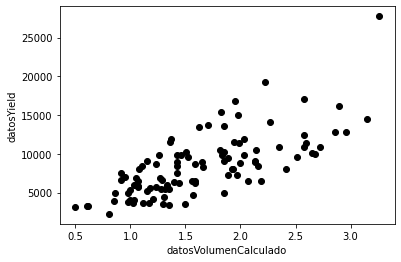

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> PROCESAMIENTO DE DATA

In [2]:
dataframe,datos = definirCorrelacionVariables.generarMatrizDatos(data)

0
164
103
Muestras Ramas 21.000000
Muestras Nodos 48.000000
nodosPorRama 9.571429
cafesPorNodo 11.395833
#################################footer
Muestras Ramas 28.000000
Muestras Nodos 55.000000
nodosPorRama 14.714286
cafesPorNodo 11.090909
Total 11867.436418
VolumenImage : 1.401 
VolumenCalc : 1.367 
193
102
Muestras Ramas 43.000000
Muestras Nodos 57.000000
nodosPorRama 13.790698
cafesPorNodo 4.000000
#################################footer
Muestras Ramas 27.000000
Muestras Nodos 48.000000
nodosPorRama 7.481481
cafesPorNodo 5.000000
Total 8947.066322
VolumenImage : 2.290 
VolumenCalc : 2.136 
160
101
Muestras Ramas 41.000000
Muestras Nodos 57.000000
nodosPorRama 14.195122
cafesPorNodo 9.298246
#################################footer
Muestras Ramas 28.000000
Muestras Nodos 44.000000
nodosPorRama 5.000000
cafesPorNodo 7.000000
Total 16796.829268
VolumenImage : 1.646 
VolumenCalc : 1.955 
198
100
Muestras Ramas 42.000000
Muestras Nodos 56.000000
nodosPorRama 11.809524
cafesPorNodo 7.0000

OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

In [3]:
print(len(datos.datosYeld))
dataframe.corr(method="pearson")

103


,yields,ndvi,volumenImagen,volumenCalculado,areaCalculada,areaImagen,alturaCalculada,alturaImagen
yields,1.000000,0.091865,0.703230,0.722154,0.605750,0.580357,0.679500,0.738318
ndvi,0.091865,1.000000,-0.241543,-0.187860,-0.128811,-0.213522,-0.239771,-0.091752
volumenImagen,0.703230,-0.241543,1.000000,0.948400,0.787971,0.925925,0.832837,0.709445
volumenCalculado,0.722154,-0.187860,0.948400,1.000000,0.827770,0.938198,0.715321,0.810952
areaCalculada,0.605750,-0.128811,0.787971,0.827770,1.000000,0.801173,0.581702,0.653904
areaImagen,0.580357,-0.213522,0.925925,0.938198,0.801173,1.000000,0.582783,0.574280
alturaCalculada,0.679500,-0.239771,0.832837,0.715321,0.581702,0.582783,1.000000,0.754090
alturaImagen,0.738318,-0.091752,0.709445,0.810952,0.653904,0.574280,0.754090,1.000000


GRAFICAS ENTRE VARIABLES

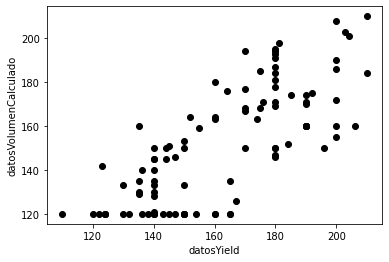

In [4]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(datos.datosAltura,datos.datosAlturaCalculada,c="black")
pyplot.xlabel("datosYield")
pyplot.ylabel("datosVolumenCalculado")

pyplot.show()

SE CALCULA LA VARIABLE COMBINADA
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

$diameter = 2*\sqrt(\frac{area}{\pi})$

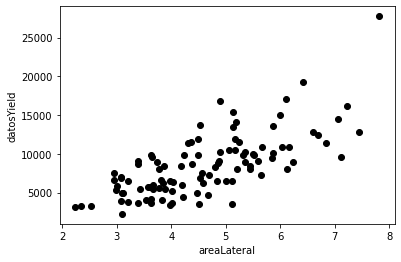

In [5]:

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = diametro*diametro*altura
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)

pyplot.scatter(areaLateral,datos.datosYeld,c="black")
pyplot.xlabel("areaLateral")
pyplot.ylabel("datosYield")

pyplot.show()


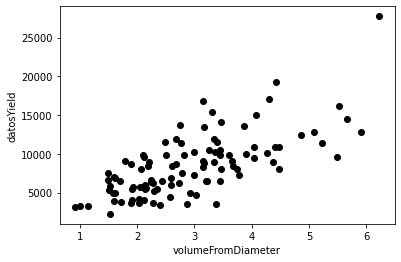

In [6]:
pyplot.scatter(volumeFromDiameter,datos.datosYeld,c="black")
pyplot.xlabel("volumeFromDiameter")
pyplot.ylabel("datosYield")

pyplot.show()

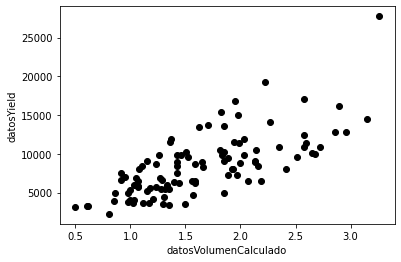

In [7]:
pyplot.scatter(datos.datosVolumenCalculado,datos.datosYeld,c="black")
pyplot.xlabel("datosVolumenCalculado")
pyplot.ylabel("datosYield")

pyplot.show()


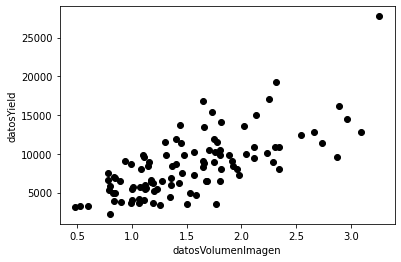

In [8]:
pyplot.scatter(datos.datosVolumen,datos.datosYeld,c="black")
pyplot.xlabel("datosVolumenImagen")
pyplot.ylabel("datosYield")

pyplot.show()

<b style="color:red;">Area Lateral Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Area Lateral y Yield

In [9]:

popt, pcov = curve_fit(definirCorrelacionVariables.objective, areaLateral, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(areaLateral, *popt)
r2_score(datos.datosYeld, y_pred)

0.5097967924833244

<b style="color:red;">Volumen From Diametro Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen calculado desde el diametro y Yield

In [10]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, volumeFromDiameter, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(volumeFromDiameter, *popt)
r2_score(datos.datosYeld, y_pred)

0.49453312685004136

<b style="color:red;">Volumen Calculado Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen calculado desde el diametro y Yield

In [11]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, datos.datosVolumenCalculado, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(datos.datosVolumenCalculado, *popt)
r2_score(datos.datosYeld, y_pred)

0.5215063346302524

<b style="color:red;">Volumen Imagen Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen Imagen y Yield

In [12]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, datos.datosVolumen, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(datos.datosVolumen, *popt)
r2_score(datos.datosYeld, y_pred)

0.49453312685004136

<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


In [13]:
import pandas as pd
IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {'yields': datos.datosYeld,"Area Lateral":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area,"volumenImagen":datos.datosVolumen,"volumenCalculado":datos.datosVolumenCalculado,"areaCalculada":datos.datosAreaCalculada,'areaImagen': datos.datosArea,"alturaCalculada":datos.datosAlturaCalculada,"alturaImagen":datos.datosAltura}
df = pd.DataFrame(data=d)
df.corr(method="pearson")

,yields,Area Lateral,IAF_VOL,IAF_AREA,volumenImagen,volumenCalculado,areaCalculada,areaImagen,alturaCalculada,alturaImagen
yields,1.000000,0.714001,0.703230,0.714001,0.703230,0.722154,0.605750,0.580357,0.679500,0.738318
Area Lateral,0.714001,1.000000,0.993002,1.000000,0.993002,0.932618,0.779929,0.894771,0.882646,0.739974
IAF_VOL,0.703230,0.993002,1.000000,0.993002,1.000000,0.948400,0.787971,0.925925,0.832837,0.709445
IAF_AREA,0.714001,1.000000,0.993002,1.000000,0.993002,0.932618,0.779929,0.894771,0.882646,0.739974
volumenImagen,0.703230,0.993002,1.000000,0.993002,1.000000,0.948400,0.787971,0.925925,0.832837,0.709445
volumenCalculado,0.722154,0.932618,0.948400,0.932618,0.948400,1.000000,0.827770,0.938198,0.715321,0.810952
areaCalculada,0.605750,0.779929,0.787971,0.779929,0.787971,0.827770,1.000000,0.801173,0.581702,0.653904
areaImagen,0.580357,0.894771,0.925925,0.894771,0.925925,0.938198,0.801173,1.000000,0.582783,0.574280
alturaCalculada,0.679500,0.882646,0.832837,0.882646,0.832837,0.715321,0.581702,0.582783,1.000000,0.754090
alturaImagen,0.738318,0.739974,0.709445,0.739974,0.709445,0.810952,0.653904,0.574280,0.754090,1.000000


LINEAR REGRESSION

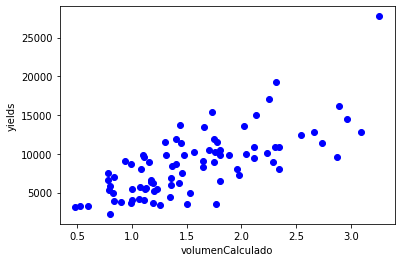

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
pyplot.scatter(train["volumenImagen"], train["yields"],  color='blue')
pyplot.xlabel("volumenCalculado")
pyplot.ylabel("yields")
pyplot.show()

CROSS VALIDATION

                yields  volumenImagen
yields         1.00000        0.70323
volumenImagen  0.70323        1.00000


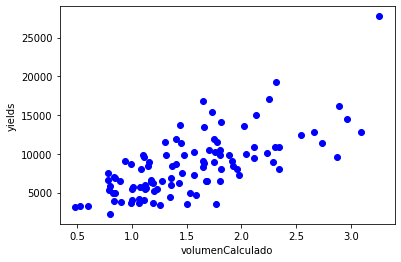

[-0.19988472  0.36047951 -0.02366514 -0.0960167  -0.18617525  0.18223166]


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
dfs=df.loc[:,["yields","volumenImagen"]]
print(dfs.corr(method="pearson"))
pyplot.scatter(dfs.volumenImagen.values.reshape(-1, 1), dfs.yields.values,  color='blue')
pyplot.xlabel("volumenCalculado")
pyplot.ylabel("yields")
pyplot.show()
scores = cross_val_score(lm,dfs.volumenImagen.values.reshape(-1, 1) ,dfs.yields.values , scoring='r2', cv=4)
print(scores)